In [2]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
import time
import scipy.stats as st
from scipy.stats import linregress

In [3]:
## Output File (CSV)
data_file_day = "Resources/Bike_Share_Season.csv"
datafile="Resources/Bike_Share_Day.csv"
#Creating DataFrame
Bike_Share_Season_df=pd.read_csv(data_file_day)
Bike_Share_Day=pd.read_csv(datafile)
Bike_Share_Season_df.head()
Bike_Share_Day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt,Weather
0,1,2011-01-01,1,0,1,0,6,0,2,985,Cloudy
1,2,2011-01-02,1,0,1,0,0,0,2,801,Cloudy
2,3,2011-01-03,1,0,1,0,1,1,1,1349,Clear
3,4,2011-01-04,1,0,1,0,2,1,1,1562,Clear
4,5,2011-01-05,1,0,1,0,3,1,1,1600,Clear


# Time of day vs Bike Rentals

In [4]:
#Checking if the Time of the day affetcs Bike Rentals
Bike_Share_Hour=Bike_Share_Season_df.copy()
Bike_Hour_Count=Bike_Share_Hour.groupby(Bike_Share_Hour['hr']).sum()['cnt']
Bike_Hour_Count_df=pd.DataFrame({'Bike Count':Bike_Hour_Count})
Bike_Hour_Count_df

,Bike Count
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


In [5]:
#Checking for the hour of day with minimum Bike Rentals
Bike_Hour_Count_df.loc[Bike_Hour_Count_df['Bike Count']==Bike_Hour_Count_df['Bike Count'].min()]

,Bike Count
hr,
4,4428


In [6]:
#Checking for the hour of day with maximum Bike Rentals
Bike_Hour_Count_df.loc[Bike_Hour_Count_df['Bike Count']==Bike_Hour_Count_df['Bike Count'].max()]

,Bike Count
hr,
17,336860


# Plotting the Data

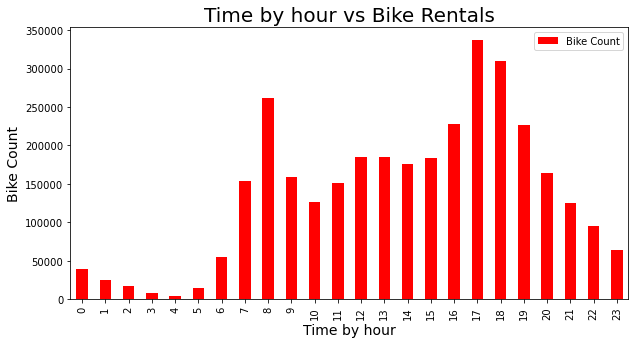

In [7]:
#Plotting the hour of day with Bike Rentals
Bike_Hour_Count_df.plot.bar(figsize=(10,5), color='r',fontsize = 10)
plt.xlabel("Time by hour",fontsize = 14)
plt.ylabel("Bike Count",fontsize = 14)
plt.title("Time by hour vs Bike Rentals",fontsize = 20)
plt.savefig('Output/barplot_Time_by_hour.png', bbox_inches = "tight")
plt.show()

# Seasons vs Bike Rentals

In [8]:
#Adding Season labels
Bike_Share_Season=Bike_Share_Hour.copy()

Bike_Share_Season.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt,Season Name
0,1,2011-01-01,1,0,1,0,0,6,0,1,16,Spring
1,2,2011-01-01,1,0,1,1,0,6,0,1,40,Spring
2,3,2011-01-01,1,0,1,2,0,6,0,1,32,Spring
3,4,2011-01-01,1,0,1,3,0,6,0,1,13,Spring
4,5,2011-01-01,1,0,1,4,0,6,0,1,1,Spring


# Calculating number of bike rentals per season

In [9]:
Bike_Season_Count=Bike_Share_Season.groupby(['season','Season Name']).sum()['cnt']
Bike_Season_Count_df=pd.DataFrame({'Bike Count':Bike_Season_Count})
Bike_Season_Count_df

,,Bike Count
season,Season Name,
1,Spring,471348
2,Summer,918589
3,Fall,1061129
4,Winter,841613


In [10]:
#For TTest
Bike_df=Bike_Share_Season.groupby(Bike_Share_Season['season']).sum()['cnt']
Bike_df=pd.DataFrame({'Bike Count':Bike_df})
Bike_df=Bike_df.reset_index()
Bike_df

,season,Bike Count
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [11]:
#Checking for the season with minimum Bike Rentals
Bike_Season_Count_df.loc[Bike_Season_Count_df['Bike Count']==Bike_Season_Count_df['Bike Count'].min()]

,,Bike Count
season,Season Name,
1,Spring,471348


In [12]:
#Checking for the season with maximum Bike Rentals
Bike_Season_Count_df.loc[Bike_Season_Count_df['Bike Count']==Bike_Season_Count_df['Bike Count'].max()]

,,Bike Count
season,Season Name,
3,Fall,1061129


#  Plotting the Data

In [13]:
#Plotting the bike rental count per season
Bike_Season_Count_df

,,Bike Count
season,Season Name,
1,Spring,471348
2,Summer,918589
3,Fall,1061129
4,Winter,841613


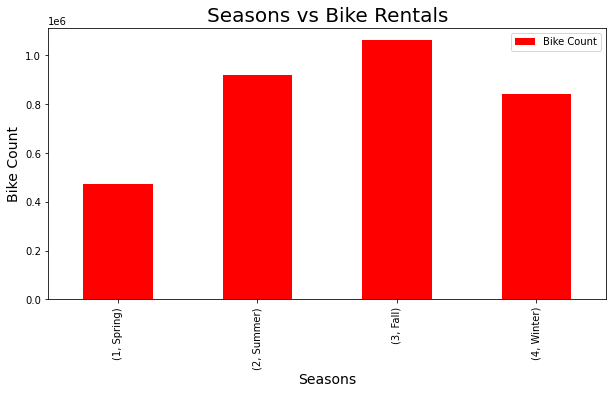

In [14]:
Bike_Season_Count_df.plot.bar(figsize=(10,5), color='r',fontsize = 10)
plt.xlabel("Seasons",fontsize = 14)
plt.ylabel("Bike Count",fontsize = 14)
plt.title("Seasons vs Bike Rentals",fontsize = 20)
plt.savefig('Output/barplot_Seasons.png', bbox_inches = "tight")
plt.show()

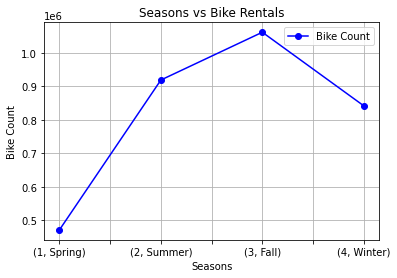

In [15]:
Bike_Season_Count_df.plot(marker="o",color="blue")
plt.title('Seasons vs Bike Rentals')
plt.xlabel('Seasons')
plt.ylabel('Bike Count')
plt.grid()
plt.savefig('Output/Lineplot_Seasons.png', bbox_inches = "tight")
plt.show()

In [16]:
#Chisquared test
#st.ttest_ind(Bike_df['season'],Bike_df['Bike Count'],equal_var=False)
observed = pd.Series([471348, 918589, 1061129, 841613], index=["1", "2", "3", "4"])

# Create a data frame
df = pd.DataFrame([observed]).T

# Add a column whose default values are the expected values
df[3] = 823169

# Rename the columns
df.columns = ["observed", "expected"]

# View the data frame
df

,observed,expected
1,471348,823169
2,918589,823169
3,1061129,823169
4,841613,823169


In [17]:
criticalvalue=st.chi2.ppf(q=.95,df=3)
criticalvalue

7.814727903251179

In [18]:
st.chisquare(df['observed'],df['expected'])

Power_divergenceResult(statistic=230630.81235687932, pvalue=0.0)

# Weather patterns vs Bike Rentals

In [19]:
#Amber
Bike_Day_Count=Bike_Share_Day.groupby(Bike_Share_Day['Weather']).sum()['cnt']

Bike_Day_Count_df=pd.DataFrame({'Rental Count via weather type':Bike_Day_Count})
Bike_Day_Count_df

,Rental Count via weather type
Weather,
Clear,2257952
Cloudy,996858
Rainy,37869


# Plotting the Data

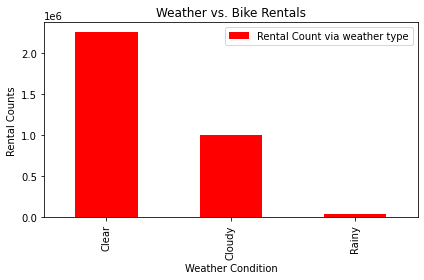

In [20]:
Bike_Day_Count_df.plot(kind="bar", facecolor="red")

plt.title ("Weather vs. Bike Rentals")
plt.ylabel("Rental Counts")
plt.xlabel("Weather Condition")
plt.tight_layout()
plt.savefig('Output/barplot_Weather.png', bbox_inches = "tight")
plt.show()

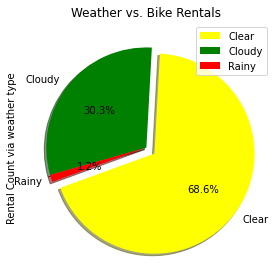

In [21]:

colors=['yellow','green','red']
explode=(0.1,0,0)
Bike_Day_Count_df.plot(kind='pie',y='Rental Count via weather type',explode=explode,colors=colors,autopct='%1.1f%%',
       shadow=True,startangle=200)
plt.title ("Weather vs. Bike Rentals")
plt.tight_layout()
plt.savefig('Output/piechart_Weather.png', bbox_inches = "tight")
plt.show()

In [22]:
Bikes_df=Bike_Share_Day.groupby(Bike_Share_Day['Weather']).sum()['cnt']
Bikes_df=pd.DataFrame({'Rental Count via weather type':Bikes_df})
Bikes_df=Bikes_df.reset_index()
Bikes_df

,Weather,Rental Count via weather type
0,Clear,2257952
1,Cloudy,996858
2,Rainy,37869


In [23]:
observed = pd.Series([2257952,996858,37869], index=["Clear", "Cloudy", "Rainy"])

df = pd.DataFrame([observed]).T

df[2] = 1097560

df.columns = ["observed", "expected"]

df

,observed,expected
Clear,2257952,1097560
Cloudy,996858,1097560
Rainy,37869,1097560


In [24]:
# The degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = st.chi2.ppf(q = 0.95, df = 2)

In [25]:
# The critical value
critical_value

5.991464547107979

In [26]:
# Run the chi square test with stats.chisquare()
st.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=2259189.0210548854, pvalue=0.0)

# Weekday versus Weekend versus Holidays Bike Rentals

In [27]:
#Aurelian
Bike_Share_Day_Drop = Bike_Share_Day[['weekday', 'workingday', 'holiday', 'cnt']]
Bike_Share_Day_Drop['cnt'].sum()
# Number of rentals over the workingdays

# Identifying the day types
WorkingDay_Bike_Share = Bike_Share_Day_Drop.loc[Bike_Share_Day_Drop['workingday'] == 1]
Weekends_Bike_Share = Bike_Share_Day_Drop.loc[(Bike_Share_Day_Drop['weekday'] == 0) | (Bike_Share_Day_Drop['weekday'] == 6)]
Holiday_Bike_Share = Bike_Share_Day_Drop.loc[Bike_Share_Day_Drop['holiday'] == 1]

# Counting number of rentals per day type
WorkingDay_Counts = WorkingDay_Bike_Share['cnt'].sum()
WeekendsDay_Counts = Weekends_Bike_Share['cnt'].sum()
HolidayDays_Counts = Holiday_Bike_Share['cnt'].sum()

# printing results
print(f'Working Days Count: {WorkingDay_Counts}, Weekend Days Count: {WeekendsDay_Counts} and Holidays Count: {HolidayDays_Counts}')

# Verifying counts
totalbike_counts = Bike_Share_Day_Drop['cnt'].sum()
totalbike_counts_var = WorkingDay_Counts + WeekendsDay_Counts + HolidayDays_Counts
print(f' OG {totalbike_counts}, verif {totalbike_counts_var}')
# getting average counts per diem
Number_of_WorkingDays = WorkingDay_Bike_Share['cnt'].count()
WorkingDay_Counts_perdiem = WorkingDay_Counts/Number_of_WorkingDays

Number_of_Weekend_Days = Weekends_Bike_Share['cnt'].count()
WeekendDay_Counts_perdiem = WeekendsDay_Counts/Number_of_Weekend_Days

Number_of_Holidays = Holiday_Bike_Share['cnt'].count()
HoliDay_Counts_perdiem = HolidayDays_Counts/Number_of_Holidays

print(f' Workingdays {Number_of_WorkingDays}, Weekends {Number_of_Weekend_Days}, Holidays {Number_of_Holidays}')
print(f' Total Days {Number_of_WorkingDays + Number_of_Weekend_Days + Number_of_Holidays}')
print(f" Working Days Average Ride Count: {WorkingDay_Counts_perdiem}, Weekend Days Average Ride Count: {WeekendDay_Counts_perdiem}, Holidays Average Ride Count: {HoliDay_Counts_perdiem}")

Working Days Count: 2292410, Weekend Days Count: 921834 and Holidays Count: 78435
 OG 3292679, verif 3292679
 Workingdays 500, Weekends 210, Holidays 21
 Total Days 731
 Working Days Average Ride Count: 4584.82, Weekend Days Average Ride Count: 4389.685714285714, Holidays Average Ride Count: 3735.0


# Plotting the Data

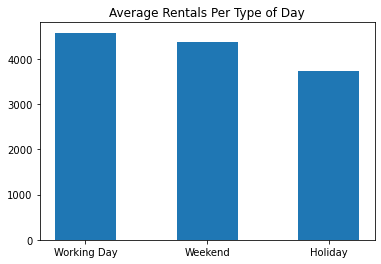

In [28]:
height = [WorkingDay_Counts_perdiem, WeekendDay_Counts_perdiem, HoliDay_Counts_perdiem]
x = np.arange(len(height))
tick_locations = [value for value in x]
plt.xticks(tick_locations, ["Working Day", "Weekend", "Holiday"])
plt.title("Average Rentals Per Type of Day")
plt.bar(x, height, width=0.5, bottom=None, align='center', data=None)
plt.savefig('Output/barplot_DayoftheWeek.png', bbox_inches = "tight")
plt.show()

In [29]:
type_of_day_dict = {'Type of Day': ['Working Day', 'Weekend Day', 'Holiday Day'],
               'Average Count':[round(WorkingDay_Counts_perdiem,0),
                           round(WeekendDay_Counts_perdiem, 0), 
                           round(HoliDay_Counts_perdiem,0)]
               }
type_of_day_df = pd.DataFrame(type_of_day_dict)
type_of_day_df

,Type of Day,Average Count
0,Working Day,4585.0
1,Weekend Day,4390.0
2,Holiday Day,3735.0


# Plotting the Data

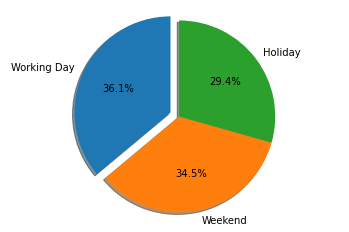

In [31]:
labels = 'Working Day', 'Weekend', 'Holiday'
sizes = [WorkingDay_Counts_perdiem, WeekendDay_Counts_perdiem, HoliDay_Counts_perdiem]
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.savefig('Output/Piechart_DayoftheWeek.png', bbox_inches = "tight")
plt.show()

# Performing ANOVA test on the number of rentals for each type of day.

In [49]:
group1 = WorkingDay_Bike_Share['cnt']
group2 = Weekends_Bike_Share['cnt']
group3 = Holiday_Bike_Share['cnt']
st.f_oneway(group1, group2, group3)

F_onewayResult(statistic=2.465184866770529, pvalue=0.08570238266758495)